# EXAMEN

### Ejercicio 1

In [13]:
# imports
import glob as glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# ---------------------------- / LECTURA DE DATOS / ----------------------------------
data = pd.read_csv("dementia_dataset.csv") 



# --------------- / ATRIBUTOS / ---------------------
unnecessary_columns = [
    "Subject ID", 
    "MRI ID", 
    "Hand"          #
    ]
oneHot_columns = [
    "M/F"
    ]
standardScaling_columns = [
    "EDUC",
    "SES",
    "MMSE",
    "CDR",
    "eTIV",
    "nWBV",
    "ASF",
    "Visit",        #
    "MR Delay"
]
labeled_columns = [         # en este caso solo hay una columna que queramos, como es la solucion la codificamos por separado
    "Group"
    ]  
solucion = "Group"



# ---------------- / DROP /  -------------------
# pandas tiene la opcion de quitar columnas segun sus nombres
final_data = data.drop(columns=unnecessary_columns) 
# ----------------------------------------------------------------------



# ---------------- / OHE /  -------------------
encoder = OneHotEncoder(sparse_output=False) 
encoder_final = encoder.fit_transform(data[oneHot_columns])  
oneHot_df = pd.DataFrame(encoder_final, columns=encoder.get_feature_names_out(oneHot_columns))
# ----------------------------------------------------------------------



# ---------------- / SS /  -------------------
scaler = StandardScaler()
scaler_final = scaler.fit_transform(data[standardScaling_columns])
df_sc = pd.DataFrame(scaler_final, columns=standardScaling_columns, index=data.index)
# ----------------------------------------------------------------------



# ----------------- / LABELED ENCODER / -------------------------   
labler = LabelEncoder()
labeled_final = labler.fit_transform(data[labeled_columns])
df_lbl = pd.DataFrame(labeled_final, columns=labeled_columns, index=data.index)
# ----------------------------------------------------------------------



# junta el df sin las columnas del oneHot con las del oneHot en el eje de columnas
final_data = pd.concat([df_sc, oneHot_df], axis=1)
final_data = pd.concat([final_data, df_lbl], axis=1)



final_data = final_data.dropna(how="any")

labeled_data = final_data[solucion]
final_data = final_data.drop(columns=[solucion]) 

# para guardarlas en un archivo
final_data.to_csv("./examen.csv", index=False)


c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Ejercicio 2

C:\Users\Ines\AppData\Local\Temp\ipykernel_7308\2789643839.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
C:\Users\Ines\AppData\Local\Temp\ipykernel_7308\2789643839.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


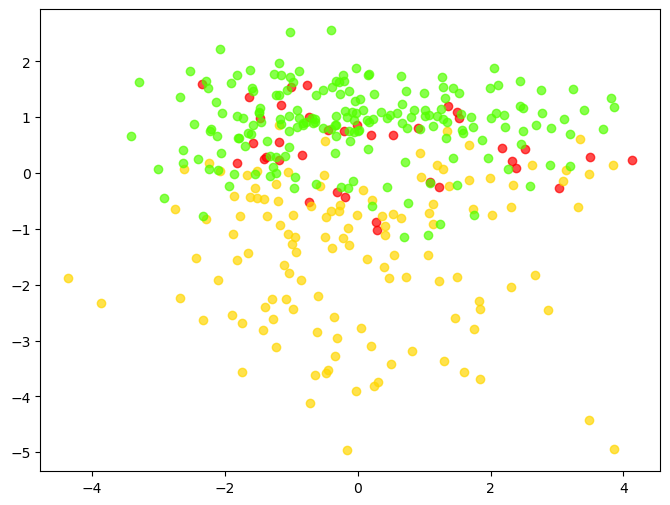

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# para estos hay que estar en el entorno, mejor abrir con anaconda
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -------------------- / FILTRADO DE DATOS / -------------------
x = final_data
y = labeled_data

color = y  #codificando cada action como un color

# ------------------- / DISMINUCION DE DIMENSIONES / ------------------------ 

# MOMENTO PCA: 
# eL PCA lo que hace es minimizar linealmente el numero de atributos que queramos representar segun sus correlaciones, 
# es decir, intenta sacar las x variables mas representativas
# indicamos cuantos componentes queremos, como queremos hacer la representacion visual ponemos 2
pca_comp = PCA(n_components=2)
x_pca = pca_comp.fit_transform(x)

# ---------------------------- / PINTADO / ------------------------ 

# monta lo que quiero pintar
clase = "Group"
df_pca = pd.DataFrame({
    "PC1": x_pca[:, 0],
    "PC2": x_pca[:, 1],
    clase: y
})
grupos = sorted(df_pca[clase].unique())

# colores
colormap = plt.colormaps.get_cmap("prism")
colors = colormap(np.linspace(0, 1, len(grupos)))

# dibujado
plt.figure(figsize=(8,6))
for idx, grupo in enumerate(grupos):
    # para pintar cada posible solucion
    subset = df_pca[df_pca[clase] == grupo]
    plt.scatter(
        subset["PC1"], 
        subset["PC2"],
        label=f"Grupo {grupo}",
        c = colors[idx],
        cmap = "twilight_r",
        alpha = 0.7
        )


plt.show()

## Ejercicio 3

In [19]:
import MLP_Complete as mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = final_data.values
y = labeled_data.values

# separa los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# esto no lo entiendo AUN
y_train = y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)


Iteration      1: Cost   2.0169   
Iteration    101: Cost   1.6673   
Iteration    201: Cost   1.6602   
Iteration    301: Cost   1.1340   
Iteration    401: Cost   0.6116   
Iteration    501: Cost   0.5946   
Iteration    601: Cost   0.5769   
Iteration    701: Cost   0.5559   
Iteration    801: Cost   0.5336   
Iteration    901: Cost   0.5098   
Iteration   1001: Cost   0.4803   
Iteration   1101: Cost   0.4454   
Iteration   1201: Cost   0.4155   
Iteration   1301: Cost   0.3959   
Iteration   1401: Cost   0.4136   
Iteration   1501: Cost   0.3841   
Iteration   1601: Cost   0.3748   
Iteration   1701: Cost   0.3661   
Iteration   1801: Cost   0.3563   
Iteration   1901: Cost   0.3453   
Iteration   2000: Cost   0.3337   
-> Validacion Custom MLP: 85.39%


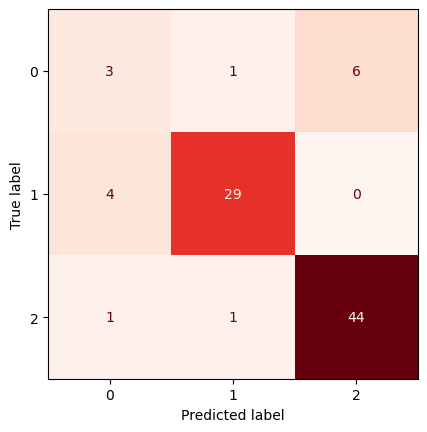

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay



# valores que vamos tocando
LAYERS=(128, 64, 32)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=2000

# mlp
mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], 
                              hiddenLayers=list(LAYERS), 
                              outputLayer=y_train_encoded.shape[1], 
                              seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train_encoded, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred = mlp_custom.predict(a[-1])
    


# resultados
acc_custom = accuracy_score(y_test, y_pred)
print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", colorbar=False)


In [21]:
from sklearn.neural_network import MLPClassifier

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='adam',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train)
y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.24763968
Iteration 2, loss = 6.32683581
Iteration 3, loss = 5.98461198
Iteration 4, loss = 4.92256153
Iteration 5, loss = 2.67754180
Iteration 6, loss = 3.26154512
Iteration 7, loss = 1.68346677
Iteration 8, loss = 2.57567877
Iteration 9, loss = 1.41371450
Iteration 10, loss = 2.05289854
Iteration 11, loss = 1.26298230
Iteration 12, loss = 1.83745834
Iteration 13, loss = 1.24329461
Iteration 14, loss = 1.56748718
Iteration 15, loss = 1.56937895
Iteration 16, loss = 1.21997622
Iteration 17, loss = 1.13055470
Iteration 18, loss = 1.06384187
Iteration 19, loss = 1.12285675
Iteration 20, loss = 1.06189480
Iteration 21, loss = 1.02311370
Iteration 22, loss = 0.99881809
Iteration 23, loss = 1.05326561
Iteration 24, loss = 1.00261225
Iteration 25, loss = 0.98884090
Iteration 26, loss = 0.98151596
Iteration 27, loss = 0.98924378
Iteration 28, loss = 0.98569573
Iteration 29, loss = 0.98338843
Iteration 30, loss = 0.98435859
Iteration 31, loss = 0.98754688
Iteration 32, los

## Ejercicio 4

-> precision DT: 88.76%


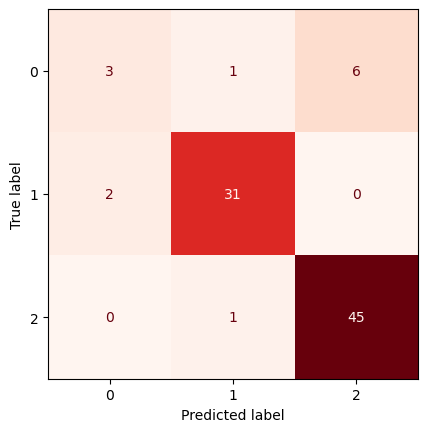

In [22]:
# codigo del decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score


dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


acc_dt = precision_score(y_test, y_pred_dt, average='micro')
print(f"-> precision DT: {acc_dt * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Reds", colorbar=False)

## Ejercicio 5




In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay



# valores que vamos tocando
LAYERS=(128, 64, 32)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=2000

# mlp
mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], 
                              hiddenLayers=list(LAYERS), 
                              outputLayer=1, 
                              seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train_encoded, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred = mlp_custom.predict(a[-1])
    


# resultados
acc_custom = accuracy_score(y_test, y_pred)
print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", colorbar=False)
